# TSNE-VISUALIZATION
    We would do TSNE-visualization of MNIST data

In [9]:
sample_length = 10000 # This "i" is the number of datapoints we are sampling
# We would perform TSNE on only first 1000 points as performing TSNE takes alot of time

In [10]:
import os
import struct
import numpy as np

"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, '../Data/train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, '../Data/train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

In [11]:
train_data = list(read(dataset='training',path='.'))

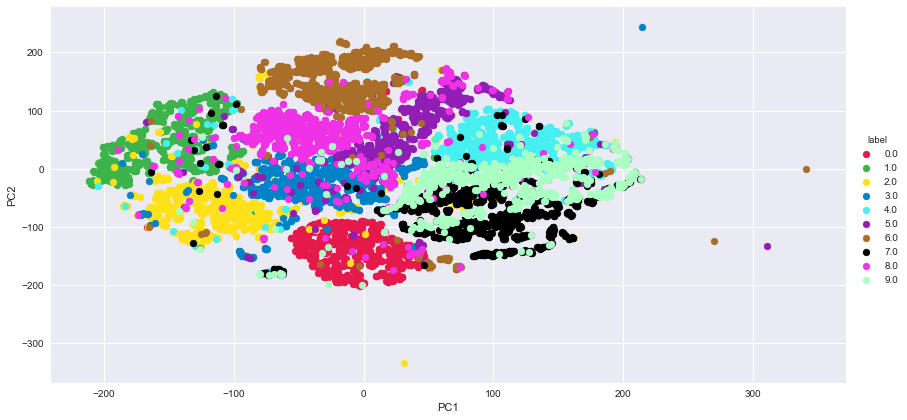

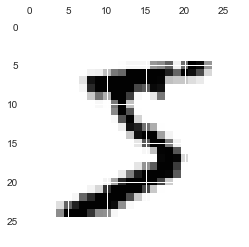

In [12]:
label, pixel = train_data[0]
show(pixel)
import matplotlib.pyplot as plt
import seaborn as sns

### Preparing the data
    In the cell below we are flatteing the data to a row(in data_all) and treating each row as a datapoint and the lables for each datapoint would be in label_all

In [13]:
import numpy as np
data_all = []
label_all = []
for i in range(0,60000):
    data_all.append(train_data[i][1].flatten())
    label_all.append(train_data[i][0])

Picking up only a few first points. On these points we would do dimensionality reduction and visualization by TSNE

In [14]:
data = data_all[0:sample_length]
data = np.array(data)
label = label_all[0:sample_length]
label = np.array(label)
data.shape, label.shape

((10000, 784), (10000,))

Down in the cell we are Standardizing the data column wise

In [15]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
stan_data = StandardScaler().fit_transform(data)
stan_data.shape, np.sum(stan_data)

((10000, 784), -1.0157208407690632e-11)

### TSNE using sklearn

In [16]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
sns.set()
dist_color = ["#e6194b", "#3cb44b", "#ffe119", "#0082c8", "#46f0f0",\
"#911eb4", '#aa6e28', '#000000','#f032e6','#aaffc3']
# We would visualize in 2D thus n_components=2
for i in range(5,801):
    model = TSNE(n_components=2,perplexity=i,n_iter=5000)
    X_embedded = model.fit_transform(stan_data)

    X_embedded = np.array([X_embedded[:,0],X_embedded[:,1],label])

    X_embedded = X_embedded.T

    # Preparing a dataframe of the embedded points with class lables
    df = pd.DataFrame(data=X_embedded\
    ,columns=['PC1','PC2','label'])

    sns.FacetGrid(df, hue="label",aspect=2,palette=sns.color_palette(dist_color), size=6) \
       .map(plt.scatter, "PC1",'PC2') \
       .add_legend()
    filename = '../tsne-visualization/'+str(model.perplexity)+'-perplexity.png'
    print (i,end='\t')
    plt.savefig(filename)
    #plt.show()

5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	

KeyboardInterrupt: 

We have done TSNE for 1000 points of MNIST and for perplexity ranging from 5 to 800. We have stored those images and now we would look at all of them and choose the best one